In [2]:
#Basic Statistical Testing

import numpy as np
import pandas as pd

from scipy import stats

In [4]:
df=pd.read_csv('grades.csv')
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [9]:
print('There are {} rows and {} columns'.format(df.shape[0], df.shape[1]))

There are 2315 rows and 13 columns


In [13]:
early_finishers=df[pd.to_datetime(df['assignment1_submission'])<'2016']
early_finishers.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000
5,D09000A0-827B-C0FF-3433-BF8FF286E15B,71.647278,2015-12-28 04:35:32.836000000,64.052550,2016-01-03 21:05:38.392000000,64.752550,2016-01-07 08:55:43.692000000,57.467295,2016-01-11 00:45:28.706000000,57.467295,2016-01-11 00:54:13.579000000,57.467295,2016-01-20 19:54:46.166000000
8,C9D51293-BD58-F113-4167-A7C0BAFCB6E5,66.595568,2015-12-25 02:29:28.415000000,52.916454,2015-12-31 01:42:30.046000000,48.344809,2016-01-05 23:34:02.180000000,47.444809,2016-01-02 07:48:42.517000000,37.955847,2016-01-03 21:27:04.266000000,37.955847,2016-01-19 15:24:31.060000000


In [14]:
late_finishers=df[~df.index.isin(early_finishers.index)]
late_finishers.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
6,3217BE3F-E4B0-C3B6-9F64-462456819CE4,87.498744,2016-03-05 11:05:25.408000000,69.998995,2016-03-09 07:29:52.405000000,55.999196,2016-03-16 22:31:24.316000000,50.399276,2016-03-18 07:19:26.032000000,45.359349,2016-03-19 10:35:41.869000000,45.359349,2016-03-23 14:02:00.987000000
7,F1CB5AA1-B3DE-5460-FAFF-BE951FD38B5F,80.576090,2016-01-24 18:24:25.619000000,72.518481,2016-01-27 13:37:12.943000000,65.266633,2016-01-30 14:34:36.581000000,65.266633,2016-02-03 22:08:49.002000000,65.266633,2016-02-16 14:22:23.664000000,65.266633,2016-02-18 08:35:04.796000000
9,E2C617C2-4654-622C-AB50-1550C4BE42A0,59.270882,2016-03-06 12:06:26.185000000,59.270882,2016-03-13 02:07:25.289000000,53.343794,2016-03-17 07:30:09.241000000,53.343794,2016-03-20 21:45:56.229000000,42.675035,2016-03-27 15:55:04.414000000,38.407532,2016-03-30 20:33:13.554000000


In [15]:
print(early_finishers['assignment1_grade'].mean())
print(late_finishers['assignment1_grade'].mean())


74.94728457024304
74.0450648477065


In [16]:
from scipy.stats import ttest_ind

ttest_ind(early_finishers['assignment1_grade'],late_finishers['assignment1_grade'])

TtestResult(statistic=1.3223540853721598, pvalue=0.18618101101713855, df=2313.0)

In [ ]:
#p-value>0.05, so we cannot reject the null hypothesis


In [18]:
print(ttest_ind(early_finishers['assignment1_grade'],late_finishers['assignment1_grade']))
print(ttest_ind(early_finishers['assignment2_grade'],late_finishers['assignment2_grade']))
print(ttest_ind(early_finishers['assignment3_grade'],late_finishers['assignment3_grade']))
print(ttest_ind(early_finishers['assignment4_grade'],late_finishers['assignment4_grade']))
print(ttest_ind(early_finishers['assignment5_grade'],late_finishers['assignment5_grade']))
print(ttest_ind(early_finishers['assignment6_grade'],late_finishers['assignment6_grade']))


TtestResult(statistic=1.3223540853721598, pvalue=0.18618101101713855, df=2313.0)
TtestResult(statistic=1.2514717608216366, pvalue=0.2108889627004424, df=2313.0)
TtestResult(statistic=1.6133726558705392, pvalue=0.10679998102227865, df=2313.0)
TtestResult(statistic=0.049671157386456125, pvalue=0.960388729789337, df=2313.0)
TtestResult(statistic=-0.05279315545404755, pvalue=0.9579012739746492, df=2313.0)
TtestResult(statistic=-0.11609743352612056, pvalue=0.9075854011989656, df=2313.0)


In [25]:
df1=pd.DataFrame([np.random.random(100) for x in range(100)])
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.568823,0.544588,0.460704,0.561303,0.339322,0.081169,0.791980,0.700888,0.828238,0.900242,...,0.404661,0.239793,0.818747,0.297296,0.346918,0.891696,0.051050,0.911036,0.680970,0.097193
1,0.445548,0.311825,0.866585,0.044470,0.409248,0.747702,0.948320,0.407646,0.292354,0.103178,...,0.882888,0.409796,0.297869,0.680283,0.455932,0.824450,0.172853,0.082629,0.062795,0.990169
2,0.171779,0.365114,0.147696,0.673141,0.080220,0.140851,0.856825,0.379931,0.027259,0.825859,...,0.551105,0.481773,0.323469,0.968290,0.459371,0.620177,0.177697,0.268706,0.144996,0.675496
3,0.671991,0.568915,0.091759,0.358031,0.645238,0.155830,0.633666,0.469992,0.949796,0.148518,...,0.609787,0.453072,0.115331,0.049954,0.815920,0.465792,0.182119,0.099716,0.093036,0.575659
4,0.900216,0.572380,0.595541,0.292728,0.610742,0.383613,0.355541,0.300803,0.720796,0.594407,...,0.021486,0.610474,0.548660,0.905051,0.903298,0.073135,0.997120,0.610216,0.907901,0.823384


In [26]:
df2=pd.DataFrame([np.random.random(100) for x in range(100)])
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.478208,0.036440,0.705883,0.496903,0.709973,0.730071,0.529208,0.388343,0.899208,0.398040,...,0.773679,0.741368,0.435987,0.812024,0.603912,0.078496,0.763224,0.988439,0.653432,0.854922
1,0.131594,0.404113,0.595097,0.750053,0.471086,0.407963,0.687540,0.631945,0.735193,0.939582,...,0.853563,0.287770,0.410660,0.569488,0.009283,0.983919,0.841092,0.977034,0.367068,0.732682
2,0.847498,0.078483,0.084337,0.242207,0.601348,0.675316,0.797444,0.039574,0.932808,0.883877,...,0.723257,0.602767,0.660077,0.151557,0.036065,0.966591,0.274804,0.055766,0.446318,0.987825
3,0.010867,0.135511,0.070805,0.398581,0.687430,0.275045,0.561050,0.162922,0.710006,0.099351,...,0.133329,0.162695,0.212671,0.161955,0.692417,0.265209,0.003240,0.489405,0.972390,0.711619
4,0.401786,0.664039,0.723412,0.145675,0.141087,0.918825,0.127108,0.529231,0.076916,0.971203,...,0.814943,0.221111,0.142985,0.146132,0.136924,0.510715,0.445236,0.823970,0.600196,0.029147


In [32]:
def test_columns(alpha=0.1):
    num_diff=0
    for col in df1.columns:
        teststat,pval=ttest_ind(df1[col],df2[col])
        if pval<=alpha:
            print('col {} is statistically significantly different at alpha={}, pval={}'.format(col,alpha,pval))
            num_diff=num_diff+1
    print('Total number different was {}, which is {}%'.format(num_diff,float(num_diff)/len(df1.columns)*100))
test_columns()

col 6 is statistically significantly different at alpha=0.1, pval=0.07758573633813444
col 8 is statistically significantly different at alpha=0.1, pval=0.023806102320018976
col 26 is statistically significantly different at alpha=0.1, pval=0.014063639863849323
col 27 is statistically significantly different at alpha=0.1, pval=0.08542599277848122
col 45 is statistically significantly different at alpha=0.1, pval=0.07174605296435992
col 46 is statistically significantly different at alpha=0.1, pval=0.03850918198552668
col 48 is statistically significantly different at alpha=0.1, pval=0.08677518292905571
col 70 is statistically significantly different at alpha=0.1, pval=0.06820545480048455
col 82 is statistically significantly different at alpha=0.1, pval=0.03487848278676692
col 84 is statistically significantly different at alpha=0.1, pval=0.031102361065675283
col 86 is statistically significantly different at alpha=0.1, pval=0.013408254467541394
col 96 is statistically significantly dif

In [33]:
test_columns(0.05)

col 8 is statistically significantly different at alpha=0.05, pval=0.023806102320018976
col 26 is statistically significantly different at alpha=0.05, pval=0.014063639863849323
col 46 is statistically significantly different at alpha=0.05, pval=0.03850918198552668
col 82 is statistically significantly different at alpha=0.05, pval=0.03487848278676692
col 84 is statistically significantly different at alpha=0.05, pval=0.031102361065675283
col 86 is statistically significantly different at alpha=0.05, pval=0.013408254467541394
Total number different was 6, which is 6.0%


In [39]:
df2=pd.DataFrame([np.random.chisquare(df=1,size=100) for x in range(100)])

test_columns()

col 0 is statistically significantly different at alpha=0.1, pval=0.007641777950744728
col 1 is statistically significantly different at alpha=0.1, pval=0.0009525009892851534
col 2 is statistically significantly different at alpha=0.1, pval=0.02535042253343105
col 3 is statistically significantly different at alpha=0.1, pval=0.00019302997201165592
col 4 is statistically significantly different at alpha=0.1, pval=0.007476256238601932
col 5 is statistically significantly different at alpha=0.1, pval=1.6071191044048754e-05
col 6 is statistically significantly different at alpha=0.1, pval=0.00013962453850330486
col 7 is statistically significantly different at alpha=0.1, pval=6.765190277419636e-06
col 8 is statistically significantly different at alpha=0.1, pval=0.000335725787276051
col 9 is statistically significantly different at alpha=0.1, pval=0.0007295529639684389
col 10 is statistically significantly different at alpha=0.1, pval=1.7275671167651058e-05
col 11 is statistically signific

In [ ]:
#Other forms of Structured Data

In [ ]:
# https://fivethirtyeight.com/features/science-isnt-broken/

# https://dataskeptic.com/blog/episodes/2016/goodharts-law

cc0: {'Erfurt', 'Mannheim', 'Augsburg', 'Stuttgart', 'Wurzburg', 'Munchen', 'Karlsruhe', 'Kassel', 'Numberg', 'Frankfurt'}
cc1: {'Delhi', 'Bangalore', 'Mumbai', 'Kolkata'}
cc2: {'TX', 'ALB', 'NY'}


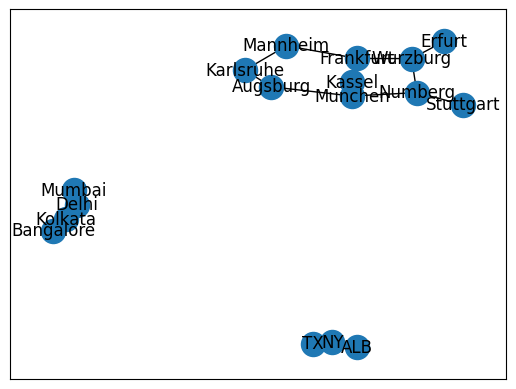

In [75]:
# https://towardsdatascience.com/data-scientists-the-five-graph-algorithms-that-you-should-know-30f454fa5513

# Connected Components
import networkx as nx

edgelist = [['Mannheim', 'Frankfurt', 85], 
            ['Mannheim', 'Karlsruhe', 80], 
            ['Erfurt', 'Wurzburg', 186], 
            ['Munchen', 'Numberg', 167], 
            ['Munchen', 'Augsburg', 84], 
            ['Munchen', 'Kassel', 502], 
            ['Numberg', 'Stuttgart', 183], 
            ['Numberg', 'Wurzburg', 103], 
            ['Numberg', 'Munchen', 167], 
            ['Stuttgart', 'Numberg', 183], 
            ['Augsburg', 'Munchen', 84], 
            ['Augsburg', 'Karlsruhe', 250], 
            ['Kassel', 'Munchen', 502], 
            ['Kassel', 'Frankfurt', 173], 
            ['Frankfurt', 'Mannheim', 85], 
            ['Frankfurt', 'Wurzburg', 217], 
            ['Frankfurt', 'Kassel', 173], 
            ['Wurzburg', 'Numberg', 103], 
            ['Wurzburg', 'Erfurt', 186], 
            ['Wurzburg', 'Frankfurt', 217], 
            ['Karlsruhe', 'Mannheim', 80], 
            ['Karlsruhe', 'Augsburg', 250], 
            ["Mumbai", "Delhi",400], 
            ["Delhi", "Kolkata",500], 
            ["Kolkata", "Bangalore",600], 
            ["TX", "NY",1200],["ALB", "NY",800]]

g = nx.Graph()
for edge in edgelist:
    g.add_edge(edge[0],edge[1], weight = edge[2])

nx.draw_networkx(g)

for i, x in enumerate(nx.connected_components(g)):
    print("cc"+str(i)+":",x)



In [66]:
# Shortest Path

print(nx.shortest_path(g, 'Stuttgart','Frankfurt',weight='weight'))
print(nx.shortest_path_length(g, 'Stuttgart','Frankfurt',weight='weight'),'km')

['Stuttgart', 'Numberg', 'Wurzburg', 'Frankfurt']
503 km


In [71]:
# Find all pairs of the shortest paths
for x in nx.all_pairs_dijkstra_path(g,weight='weight'):
    print(x)



('Mannheim', {'Mannheim': ['Mannheim'], 'Frankfurt': ['Mannheim', 'Frankfurt'], 'Karlsruhe': ['Mannheim', 'Karlsruhe'], 'Augsburg': ['Mannheim', 'Karlsruhe', 'Augsburg'], 'Kassel': ['Mannheim', 'Frankfurt', 'Kassel'], 'Wurzburg': ['Mannheim', 'Frankfurt', 'Wurzburg'], 'Munchen': ['Mannheim', 'Karlsruhe', 'Augsburg', 'Munchen'], 'Erfurt': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Erfurt'], 'Numberg': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Numberg'], 'Stuttgart': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Numberg', 'Stuttgart']})
('Frankfurt', {'Frankfurt': ['Frankfurt'], 'Mannheim': ['Frankfurt', 'Mannheim'], 'Kassel': ['Frankfurt', 'Kassel'], 'Wurzburg': ['Frankfurt', 'Wurzburg'], 'Karlsruhe': ['Frankfurt', 'Mannheim', 'Karlsruhe'], 'Augsburg': ['Frankfurt', 'Mannheim', 'Karlsruhe', 'Augsburg'], 'Munchen': ['Frankfurt', 'Wurzburg', 'Numberg', 'Munchen'], 'Erfurt': ['Frankfurt', 'Wurzburg', 'Erfurt'], 'Numberg': ['Frankfurt', 'Wurzburg', 'Numberg'], 'Stuttgart': ['Frankfurt', 'Wurzburg', 'Numb

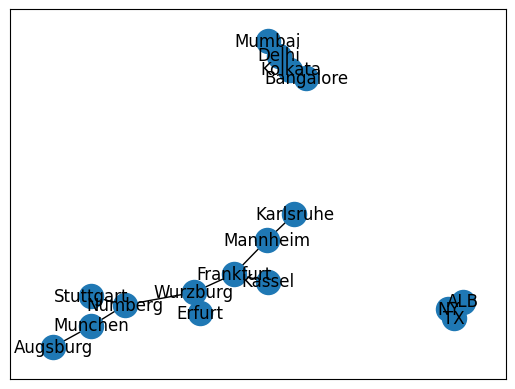

In [76]:
# Minimum Spanning Tree

# nx.minimum_spanning_tree(g) returns a instance of type graph
nx.draw_networkx(nx.minimum_spanning_tree(g))

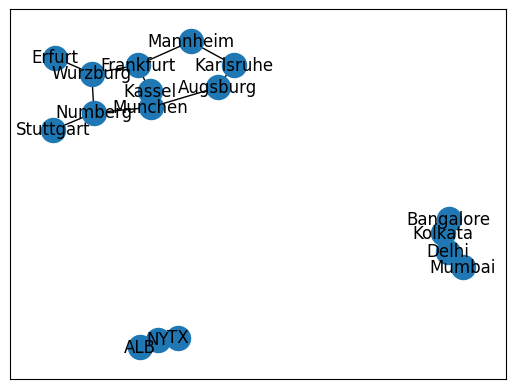

In [73]:
# Compared with minimum spanning tree plot

nx.draw_networkx(g)

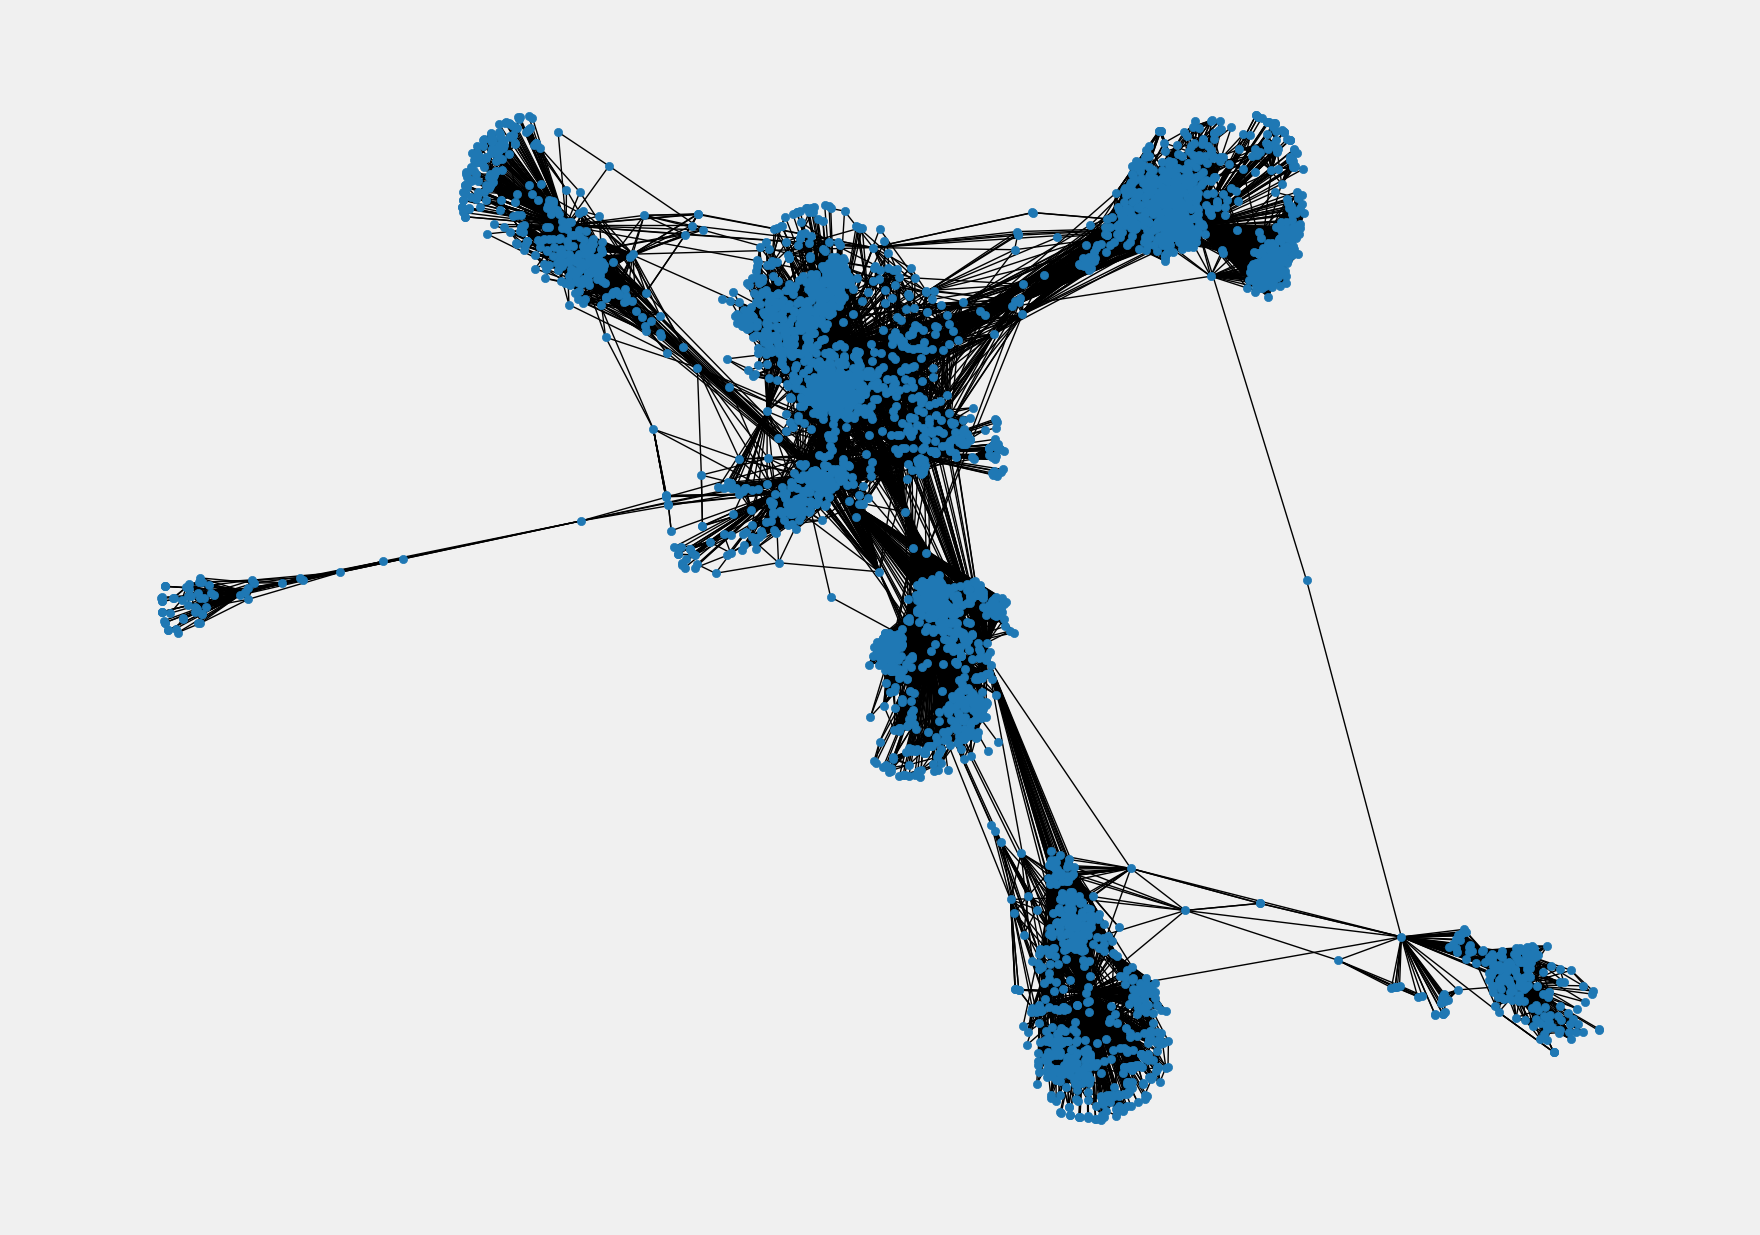

In [99]:
# Pagerank
# It has been used for finding the most influential papers using citations.
# Has been used by Google to rank pages

# facebook-combined.txt downloaded from https://snap.stanford.edu/data/egonets-Facebook.html
# In 'Social Networks', nodes (profiles), Edges represent interactions between people
# Note: when download the dataset, USA VPN may needed.

import matplotlib.pyplot as plt
# reading the dataset
fb = nx.read_edgelist('facebook-combined-1.txt', create_using = nx.Graph(), nodetype = int)

pos = nx.spring_layout(fb)
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(fb, pos, with_labels = False, node_size = 35)
plt.show()


In [100]:
pageranks = nx.pagerank(fb)
print(pageranks)

{0: 0.006289602618466542, 1: 0.00023590202311540972, 2: 0.00020310565091694567, 3: 0.00022552359869430614, 4: 0.00023849264701222462, 5: 0.00020234812068977809, 6: 0.00018001867135639642, 7: 0.00026267667111515796, 8: 0.00023737300152657922, 9: 0.0006001572433028075, 10: 0.00013504865958890368, 11: 5.2591423276218314e-05, 12: 5.2591423276218314e-05, 13: 0.0003306419576230765, 14: 0.00028864398034146046, 15: 5.2591423276218314e-05, 16: 0.00013324305769198052, 17: 0.00026000987429524483, 18: 5.2591423276218314e-05, 19: 0.00038064314056362173, 20: 0.00029297537600066995, 21: 0.0006928319433106635, 22: 0.00016385672869526872, 23: 0.0004043263404882842, 24: 0.00022824011209266327, 25: 0.0008004126605197681, 26: 0.0006922746319436038, 27: 9.900477693053426e-05, 28: 0.0002552192093758929, 29: 0.00019154955480122382, 30: 0.0002121964513121638, 31: 0.00029936195818065976, 32: 0.00014788937149430478, 33: 9.172093610965165e-05, 34: 9.248443396698941e-05, 35: 7.353643512923525e-05, 36: 0.000185026

In [101]:
# get the sorted PageRank or most influential users
import operator
sorted_pagerank = sorted(pageranks.items(), key=operator.itemgetter(1),reverse = True)
print(sorted_pagerank)

[(3437, 0.0076145868447496), (107, 0.006936420955866117), (1684, 0.006367162138306824), (0, 0.006289602618466542), (1912, 0.003876971600884498), (348, 0.002348096972780577), (686, 0.002219359259800019), (3980, 0.0021703235790099928), (414, 0.001800299047070226), (698, 0.0013171153138368812), (483, 0.0012974283300616095), (3830, 0.0011844348977671697), (376, 0.0009014073664792465), (2047, 0.0008410291545974014), (56, 0.0008039024292749443), (25, 0.0008004126605197681), (828, 0.0007886905420662137), (322, 0.0007867992190291398), (475, 0.0007853586142469625), (428, 0.0007800171933479687), (67, 0.0007724556453836683), (3596, 0.0007657185486816221), (2313, 0.0007541077515661331), (713, 0.0007493481050218993), (271, 0.0007457889296014826), (563, 0.0007402839803830181), (917, 0.0007331559412352087), (119, 0.0007319072593209059), (3545, 0.0007271573982528108), (3938, 0.000726601468756114), (277, 0.0007191102550992674), (1888, 0.0007117172673725062), (1800, 0.0006984646532952213), (3604, 0.0006

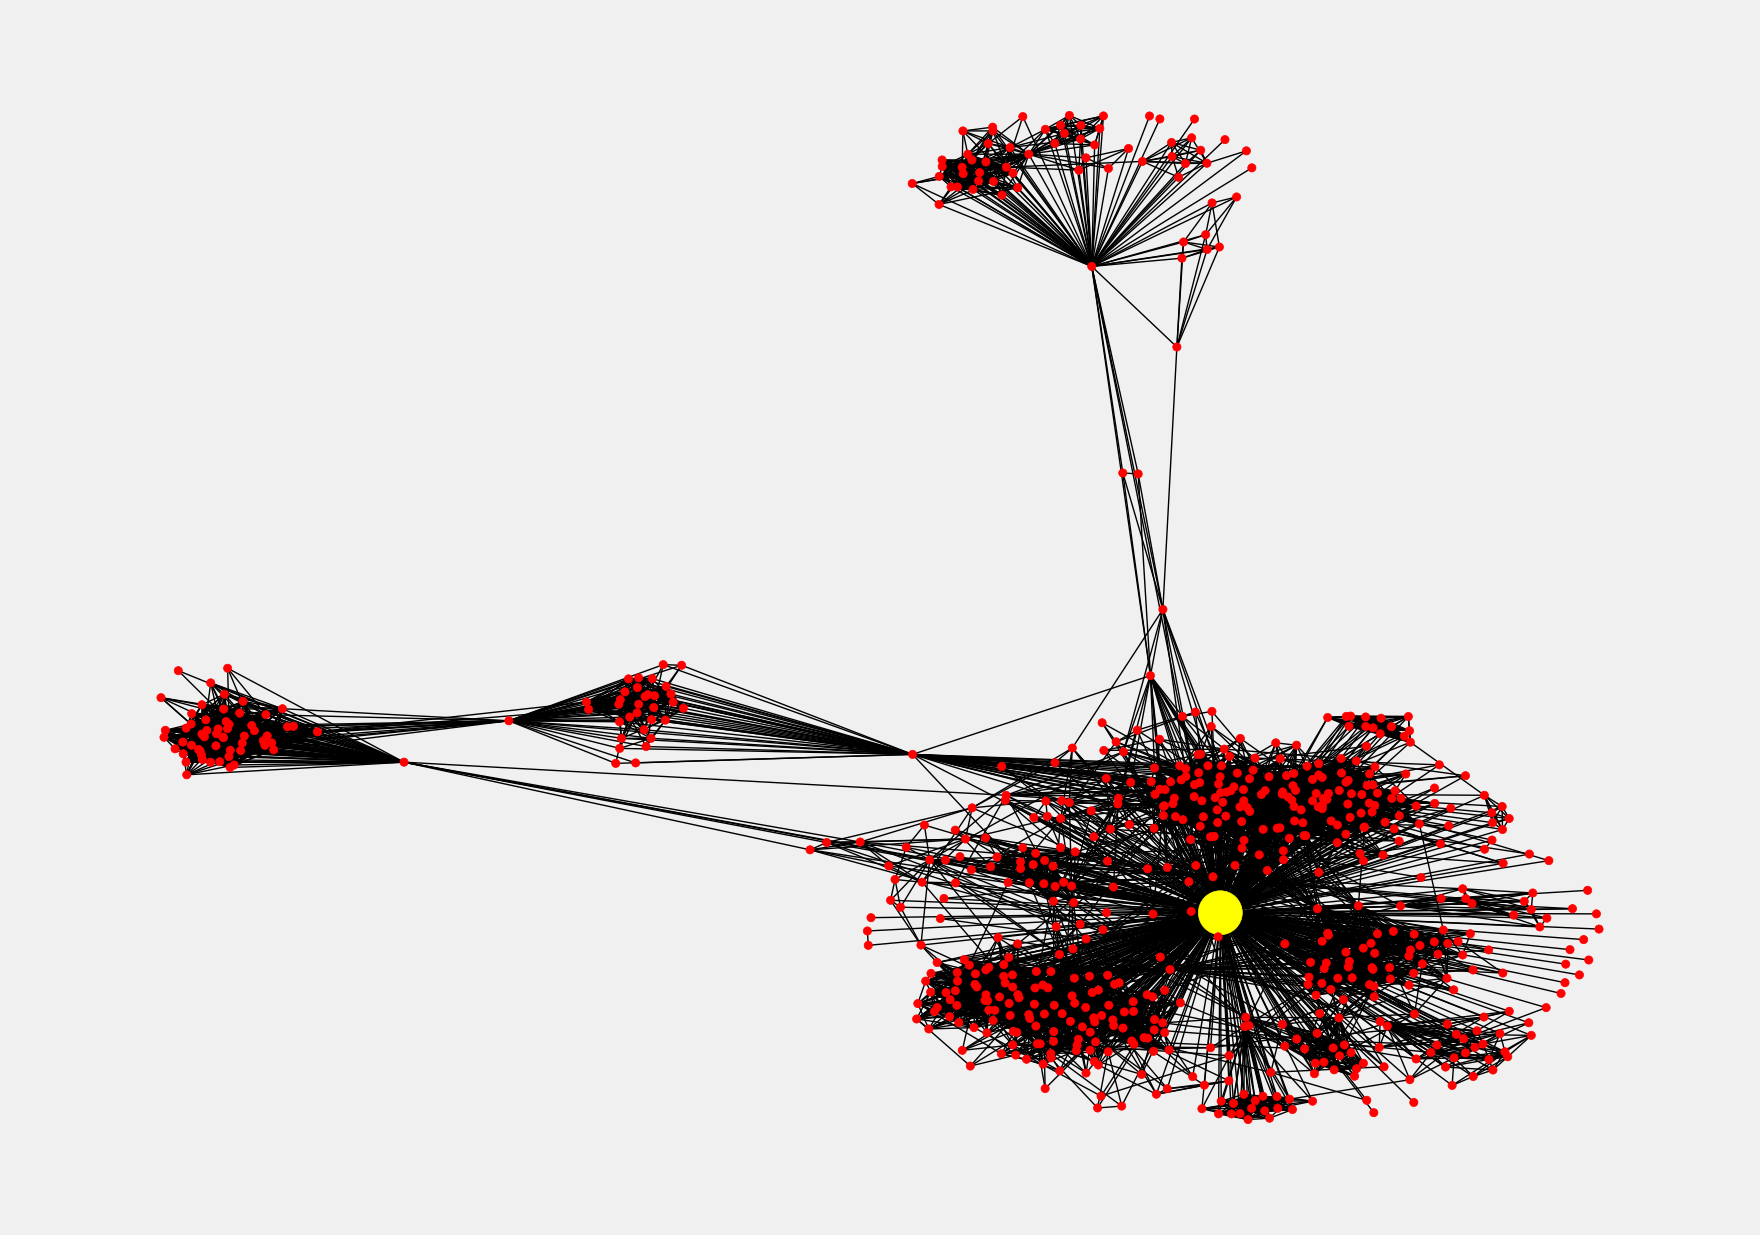

In [102]:
# The subgraph for the most influential user: 3437 (stated as the Yellow point)

first_degree_connected_nodes = list(fb.neighbors(3437))
second_degree_connected_nodes = []
for x in first_degree_connected_nodes:
    second_degree_connected_nodes+=list(fb.neighbors(x))
second_degree_connected_nodes.remove(3437)
second_degree_connected_nodes = list(set(second_degree_connected_nodes))
subgraph_3437 = nx.subgraph(fb,first_degree_connected_nodes+second_degree_connected_nodes)
pos = nx.spring_layout(subgraph_3437)
node_color = ['yellow' if v == 3437 else 'red' for v in subgraph_3437]
node_size =  [1000 if v == 3437 else 35 for v in subgraph_3437]
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(subgraph_3437, pos, with_labels = False, node_color=node_color,node_size=node_size )
plt.show()

(-0.6080212108790874,
 1.1527983956038952,
 -0.7303930987417697,
 0.48651690974831585)

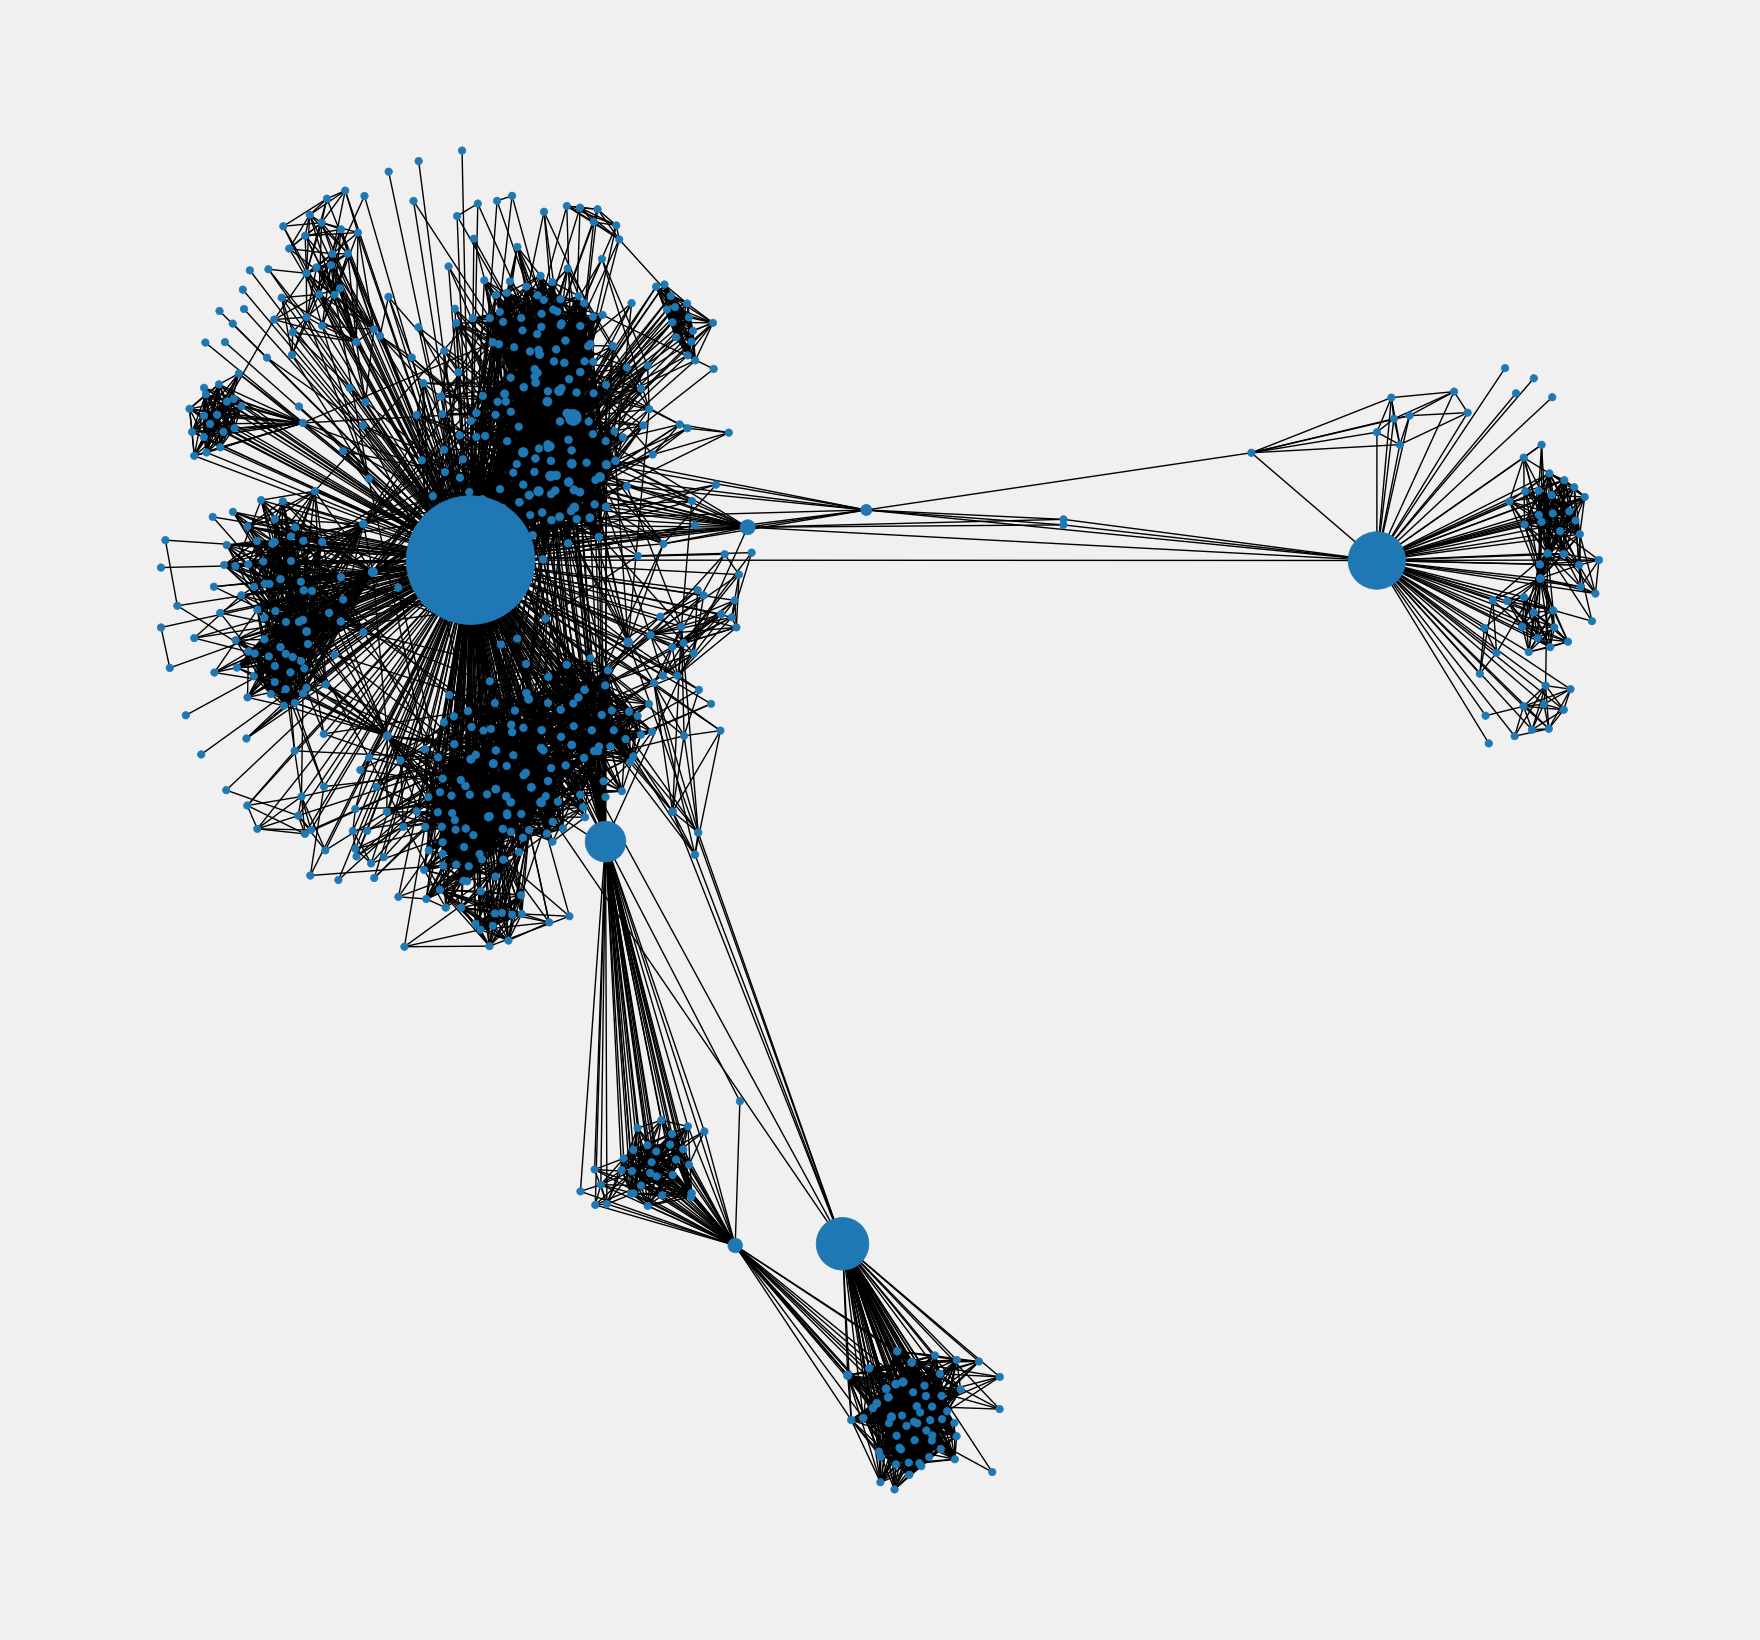

In [108]:
# Centrality Measures
# Betweenness centrality quantifies how many times a particular node comes in the shortest chosen path between two other nodes.

pos = nx.spring_layout(subgraph_3437)
betweennessCentrality = nx.betweenness_centrality(subgraph_3437,normalized=True, endpoints=True)
node_size =  [v * 10000 for v in betweennessCentrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(subgraph_3437, pos=pos, with_labels=False,
                 node_size=node_size )
plt.axis('off')